<a href="https://colab.research.google.com/github/RUDRAPRAKASHDAS/play-store-app-review-analysis./blob/main/RUDRA_PRAKASH_DAS_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

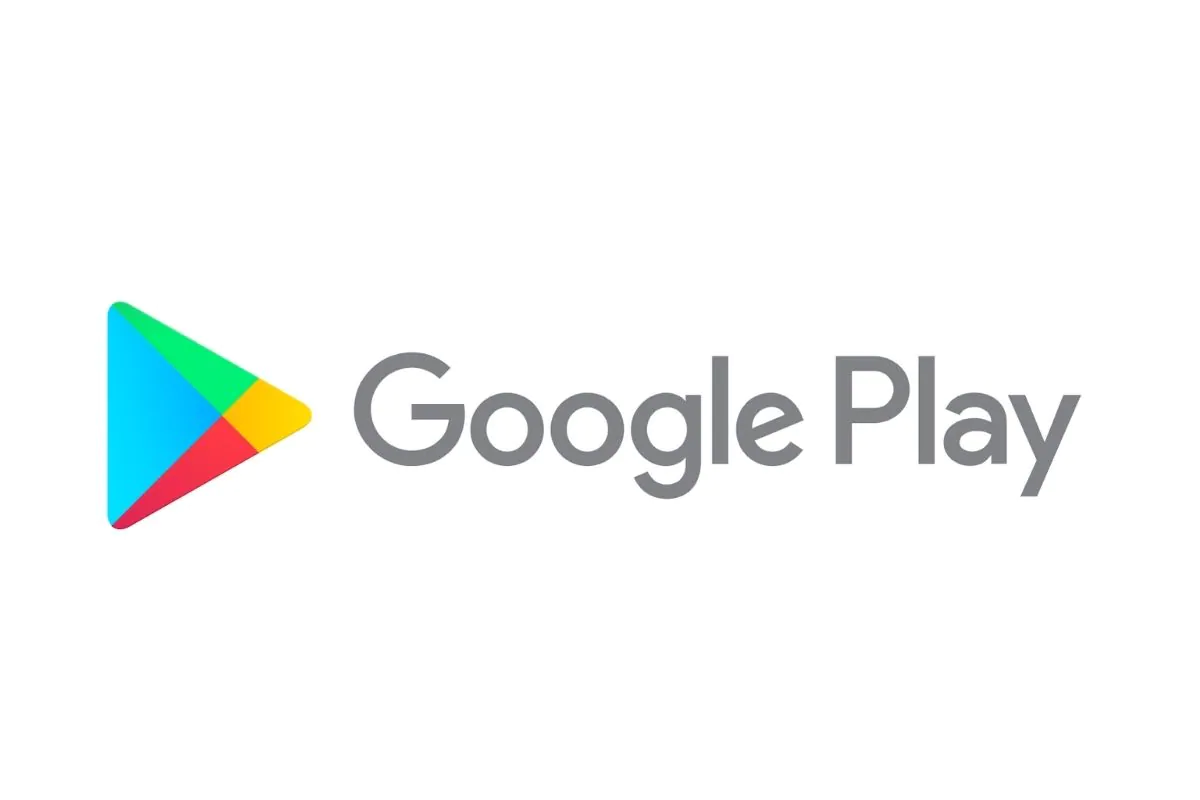

# **Android is the dominant mobile operating system today with about 85% of all mobile devices running Google’s OS. The Google Play Store is the largest and most popular Android app store.**

# **The purpose of our project was to gather and analyze detailed information on apps in the Google Play Store in order to provide insights on app features and the current state of the Android app market.**

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# A. **Main Dataset**
 
 
This file contains data on the Google Play applications. It has 10,841 rows of data with the following columns:
 
* App Category: Category of the app. This could be beauty, business, entertainment, education...etc.
 
* Rating: How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.
 
* Reviews: The number of user reviews each app has received.
 
* Size: The memory size needed to install the application.
 
* Installs: The number of times each application has been installed by users.
 
* Type: Whether the app is free or a paid app.
 
* Price: The price of the app.
 
* Content Rating: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.
 
* Genres: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.
 
* Last Updated: Release date of the most recent update for the app.
 
* Current Ver: The app's current version.
 
* Android Ver: The oldest version of Android OS supported by the app.

# B. **Sentiment Analysis**

This file contains the result of the sentiment analysis conducted by the dataset creator. It has 64,295 rows of data with the following columns:

*  App : Name of the app.

* Translated_Review: Either the original review in English, or a translated version if the orignal review is in another language.

* Sentiment: The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral, or Negative.

* Sentiment_Polarity: A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive).

* Sentiment_Subjectivity: A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#creating data files path and reading the csv files
playstore_data_path = '/content/drive/MyDrive/ALMA BETTER/EDA_CAPSTONE _PROJECT/Play Store Data.csv'
df = pd.read_csv(playstore_data_path)
user_reviews_path ='/content/drive/MyDrive/ALMA BETTER/EDA_CAPSTONE _PROJECT/User Reviews.csv'
sentiment_df = pd.read_csv(user_reviews_path)

In [4]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
print (f"Missing Values"+"\n" + "-"*20)

#sum of null values per column
df.isnull().sum()

Missing Values
--------------------


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **Task:1 Data clean up – Missing value treatment**

In [6]:
df = df.sort_values(by="Installs", ascending=False)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40M,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
474,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
3767,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,Varies with device,"500,000,000+",Free,0,Everyone 10+,News & Magazines,"August 3, 2018",Varies with device,Varies with device
3574,Cloud Print,PRODUCTIVITY,4.1,282460,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,"May 23, 2018",Varies with device,Varies with device


In [7]:
# "Life Made WI-Fi Touchscreen Photo Frame" is listed in Top. but is not a result of a huge amount of installs. 
# This is probably due to an error in data entry 
# so we remove it

df.drop([10472], inplace = True)

In [8]:
# removing null values in Rating column
print(df.shape)
df.dropna(how='any',subset=["Rating"],axis=0,inplace=True)

print(df.shape)

(10840, 13)
(9366, 13)


In [9]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [10]:
# lets analyze other null values ie. "Current Ver" & "Android Ver"
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN


In [11]:
df.loc[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up


We can Replace the Nan Values with most common value in **Both Columns**

In [12]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True)

In [13]:
df.loc[[6322,4453]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",Varies with device,4.0 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up


# **Task: 2. Data clean up – correcting the data types**

In [14]:
#  remove $ sign in Price column
df["Price"] = df["Price"].apply(lambda x:x.replace("$","") if "$" in str(x)else x)

# Removing Row of 'Everyone' in Price Column
df.drop(labels=df[df['Price'] == 'Everyone'].index, inplace = True)

# Converting into Float
df["Price"] = df["Price"].apply(lambda x: float(x))

In [15]:
df['Price'].unique()

array([  0.  ,   3.99,   1.99,   2.99,   0.99,   2.49,   5.99,   4.99,
         1.49,  17.99,   4.49,   2.  ,   3.49,  15.99,   8.99,  29.99,
       399.99,   9.99,  11.99,  19.99,   4.77,   1.75,   1.76,  14.99,
         6.99,   1.  ,   4.6 ,   3.95,   7.99,  24.99,   2.9 ,  13.99,
         9.  ,  14.  ,  12.99,  39.99,   4.59,   3.02,   6.49,   3.88,
         1.2 ,  16.99,   1.97,   5.49,  10.  ,   3.28,   2.95,   1.59,
       400.  ,   3.9 ,   2.5 ,   2.59,  18.99, 389.99, 299.99,   3.04,
        19.4 ,  15.46,   8.49,   1.7 ,  79.99,  33.99,   1.5 ,   7.49,
        10.99,   4.29,   3.08,   1.29,   1.61,  37.99, 379.99,   4.84,
         2.56])

In [16]:
# Removing "+" & "," in Install column
df['Installs'] = df['Installs'].apply(lambda x:x.replace("+","").replace(",","").strip() if "+" in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x:int(x))

In [17]:
df['Installs'].unique()

array([ 500000000,     500000,        500,   50000000,      50000,
               50,    5000000,       5000,          5,  100000000,
           100000,        100,   10000000,      10000,         10,
       1000000000,    1000000,       1000,          1])

In [18]:
# Convert all other identified columns to numeric
df['Reviews'] = df['Reviews'].astype('int')

In [19]:

df['Size'] = df['Size'].apply(lambda x: str(x).replace("M","").replace(",", "").replace("+", "").strip() if "M" in str(x) else x)

# Converting kb into Mb
df['Size'] = df['Size'].apply(lambda x:float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)


# Removing Row of 'Varies with device' in Price Column
df.drop(labels=df[df['Size'] == 'Varies with device'].index, inplace = True)

# Converting into Float
df['Size'] = df["Size"].astype(float)

In [20]:
df['Size'].dtype

dtype('float64')

In [21]:
df['Size'].unique()

array([4.00000000e+01, 1.10000000e+01, 7.40000000e+01, 6.20000000e+01,
       7.00000000e+01, 2.40000000e+01, 6.10000000e+01, 1.70000000e+01,
       1.30000000e+01, 5.20000000e+01, 1.90000000e+01, 5.00000000e+00,
       6.40000000e+00, 2.20000000e+01, 2.80000000e+00, 2.60000000e+00,
       8.10000000e+01, 1.50000000e+00, 5.90000000e+01, 3.60000000e+01,
       3.10000000e+01, 4.40000000e+01, 3.90000000e+01, 6.20000000e+00,
       1.80000000e+01, 2.10000000e+01, 3.30000000e+00, 2.30000000e+01,
       3.50000000e+01, 3.70000000e+01, 6.90000000e+00, 5.10000000e+00,
       1.20000000e+01, 6.40625000e-01, 4.60000000e+00, 3.80000000e+01,
       5.70000000e+00, 1.60000000e+01, 7.03125000e-02, 5.50000000e+01,
       3.00000000e+01, 2.00000000e+01, 6.10000000e+00, 4.60000000e+01,
       4.80000000e+00, 7.80000000e+01, 1.00000000e+01, 8.60000000e+00,
       8.70000000e+01, 1.10000000e+00, 5.80000000e+01, 5.30000000e+01,
       6.50000000e+00, 2.60000000e+01, 9.50000000e+00, 2.50000000e+01,
      

# **Task 3. Sanity checks**

1. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [22]:
# Drop any such record 

df.loc[df['Rating'] < 1]  & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


So, it seems There are no such records with rating less than 1 or greater than 5

2. Reviews should not be more than installs as only those who installed can review the app

In [23]:
df.loc[df['Rating'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
10697,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [24]:
# Removing those values
temp_data = df.loc[df['Rating'] > df['Installs']].index

df.drop(labels=temp_data,inplace=True)

In [25]:
df.loc[df['Rating'] > df['Installs']]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# **Exploratory Analysis**

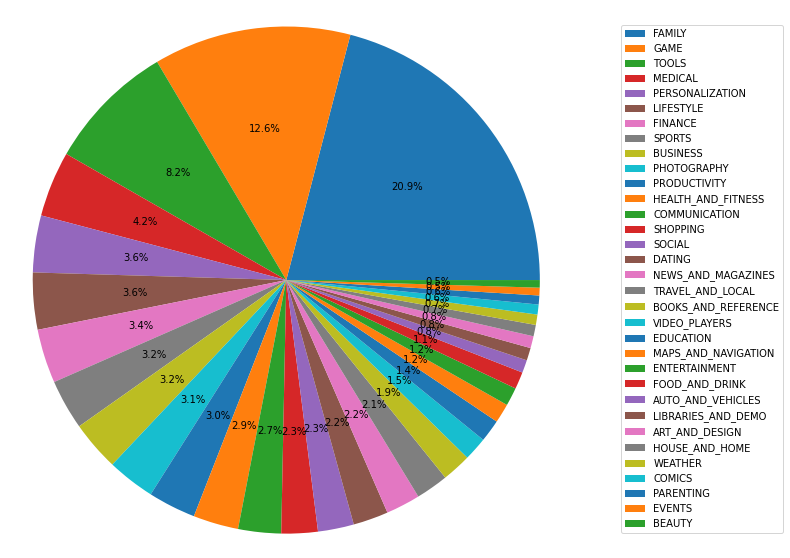

In [26]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

number_of_apps = df['Category'].value_counts()

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()



*   Family and Game apps have the highest market prevelance.

*  Interestingly, Tools, Business and Medical apps are also catching up



**Category w.r.t Installs**

In [27]:
df1 = df.groupby('Category')[ 'Installs'].mean()

In [28]:
new_df = df1.reset_index()

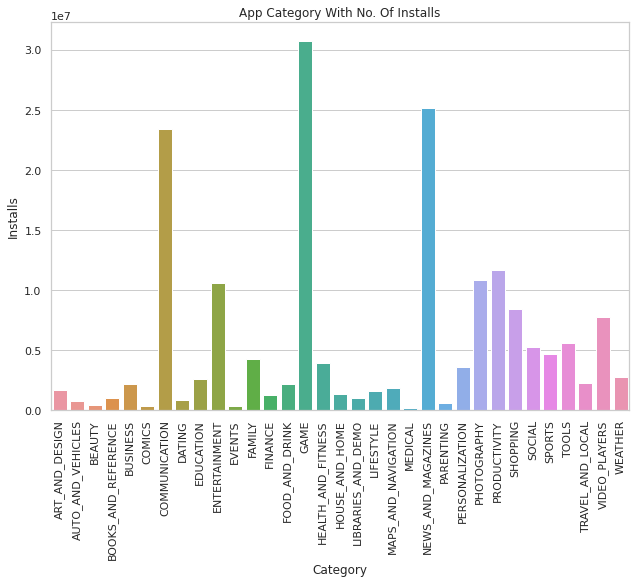

In [29]:
# Bar plot using seaborn
from pylab import rcParams
rcParams['figure.figsize'] = 9,8.27
sns.set_theme(style="whitegrid")
af = sns.barplot(x='Category',y='Installs',data=new_df).set(title="App Category With No. Of Installs")
plt.xticks(rotation=90)
plt.tight_layout()

From above Chart, we can see that **GAME** Category ha most number of downloads, followed by **News_And_Magazines** and **Communication**


 **Content Rating**

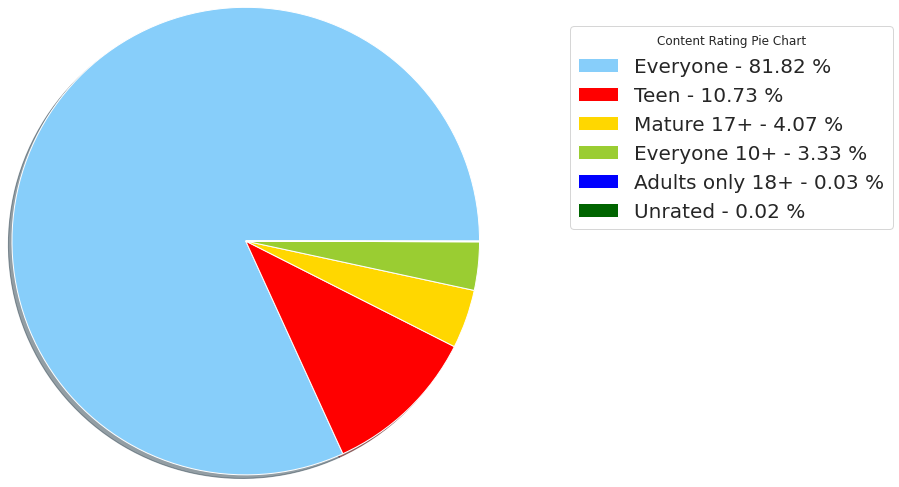

In [30]:
# We Plot the pie chart for Content rating & showing their percentages 
import matplotlib.pyplot as plt
import numpy as np

x = np.char.array(['Everyone','Teen','Mature 17+','Everyone 10+','Adults only 18+','Unrated'])
y = np.array([7903, 1036,393,322, 3, 2])
colors = ['lightskyblue', 'red', 'gold','yellowgreen' ,'blue', 'darkgreen']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors,shadow=True, startangle=360, radius=1.3)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels,title='Content Rating Pie Chart', loc='right center', bbox_to_anchor=(1.2, 1.),
           fontsize=20)

plt.savefig('piechart.png', bbox_inches='tight')

As we can see in the above pie chart Apps having content rating Everyone is having Majority and followed by Teen.

# **Rating of Apps**

Average Rating 4.17353093450686


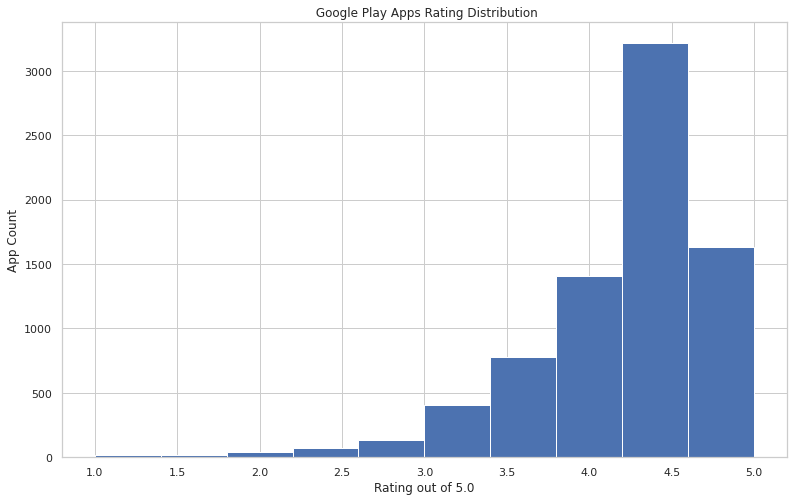

In [31]:
#Plot a histogram from the Rating column
plt.figure(figsize=(13,8))
print(f"Average Rating {df['Rating'].mean()}")

df["Rating"].hist()
plt.title(" Google Play Apps Rating Distribution")
plt.ylabel("App Count")
plt.xlabel("Rating out of 5.0")
plt.show()

Generally, most apps do well with an average rating of 4.17 or above.


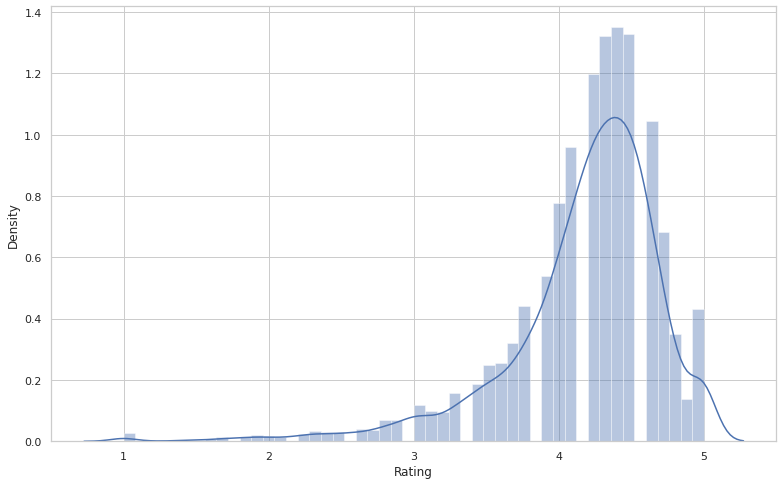

In [32]:
plt.figure(figsize=(13,8))

sns.distplot(df['Rating'])

In [33]:
df['Rating'].mode()

0    4.4
dtype: float64

Since mode>= median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values.

In [34]:
print('The skewness of this distribution is',df['Rating'].skew())
print(f'The Median of this distribution {df.Rating.median()} is greater than mean {df.Rating.mean()} of this distribution')

The skewness of this distribution is -1.7518688357099823
The Median of this distribution 4.3 is greater than mean 4.17353093450686 of this distribution


# **Best performing categories**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

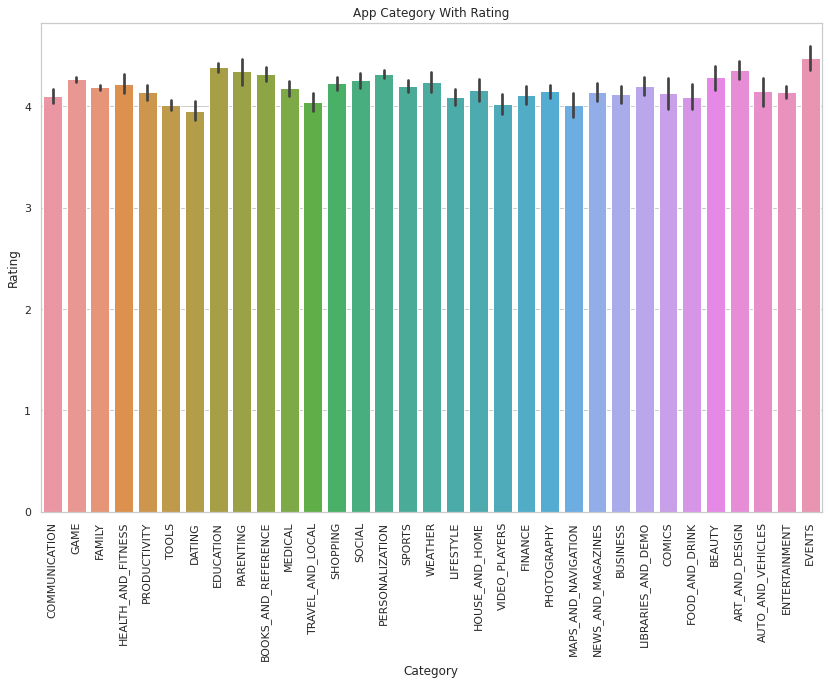

In [35]:
plt.figure(figsize=(14,9))

sns.barplot(x='Category',y='Rating',data=df).set(title="App Category With Rating")

plt.xticks(rotation=90)


Let's break this down and inspect if we have categories which perform exceptionally good or bad.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

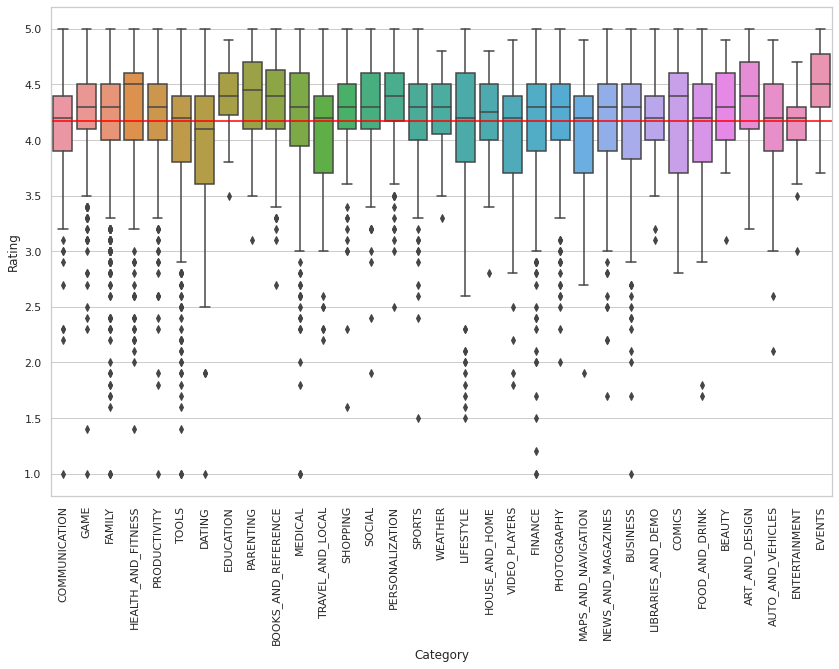

In [36]:
plt.figure(figsize=(14,9))


val = sns.boxplot(data=df, x="Category", y="Rating")
val.axhline(df['Rating'].mean(),ls="-",color="red")
plt.xticks(rotation=90)

Red Line is the Average of rating



1.   Performance of all app categories is mostly Decent. Highest quality apps with 50% apps with a rating higher than 4.5 are **Health and Fitness** and **Book and Reference** app. This is considered to be extremely high!

2.   However, the apps in **Dating** category having lower rating than the average ratings is 50%

3.   **Lifestyle, Family and Finance** category consist of a few junk apps too.



# **Sizing Strategy - Light Vs Bulky?**

<Figure size 1008x648 with 0 Axes>

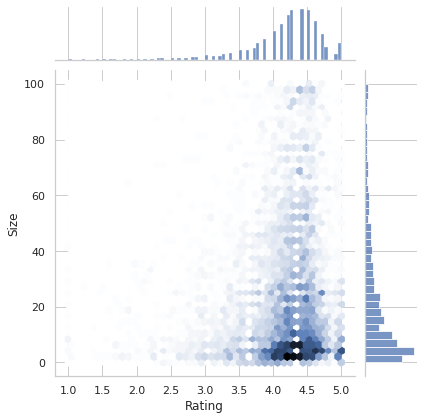

<Figure size 1008x648 with 0 Axes>

In [37]:
g =sns.jointplot(y ='Size', x ='Rating', data = df, kind ='hex')

plt.figure(figsize=(14,9))


 Do you see any patterns?




 Yes, patterns can be observed between Size and Rating ie. their is  correlation  between Size and Rating

Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

Most top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.

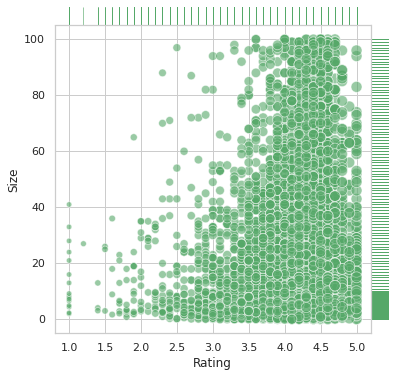

In [38]:
g = sns.JointGrid(data=df, x="Rating", y="Size", space=0, ratio=17)
sns.set_theme(style="white", color_codes=True)

g.plot_joint(sns.scatterplot, size=df["Rating"], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

# **Pricing Strategy - Free Vs Paid?**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feb394fe6d0>],
      dtype=object)

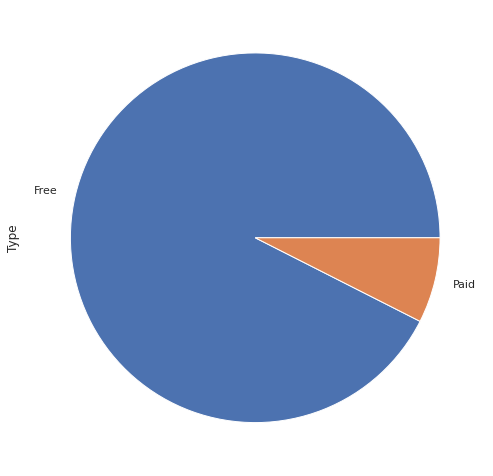

In [39]:
rcParams['figure.figsize'] = 11,8.5
df['Type'].value_counts().plot.pie(subplots=True)

In [40]:
# sns.countplot(x=df['Type'])

In [41]:
(values,counts)= np.unique(df["Type"], return_counts=True)
print(counts)
for index in range(len(values)):
    print(f"{values[index]}: {counts[index]}")

[7149  577]
Free: 7149
Paid: 577


Paid apps have a relatively lower number of downloads than free apps

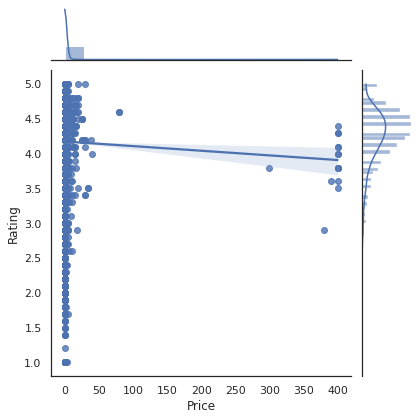

Text(0.5, 0, 'Price (U.S $)')

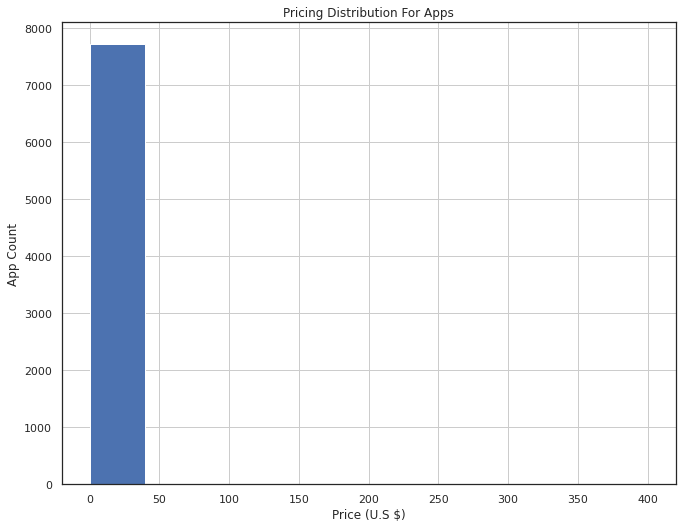

In [42]:
rcParams['figure.figsize'] = 11,8.5

sns.jointplot(x='Price', y='Rating', data=df, kind='reg')
plt.show()

# ======================
df["Price"].hist()
plt.title("Pricing Distribution For Apps")
plt.ylabel("App Count")
plt.xlabel("Price (U.S $)")

By Looking both Graphs, we can conclude that on increasing the Price, Rating remains almost constant greater than 4

Most top rated apps are optimally priced between ~1\$ to ~30\$. There are only a 


very few apps priced above 20$

But what shocking is the Apps priced above 250$ !!! Let's quickly examine what these apps are

In [43]:
expensive_apps = df.loc[df['Price'] >=250]

expensive_apps.loc[:, ["App", "Category"]]

,App,Category
5356,I Am Rich Premium,FINANCE
5369,I am Rich,FINANCE
5362,I Am Rich Pro,FAMILY
5359,I am rich(premium),FINANCE
5351,I am rich,LIFESTYLE
4197,most expensive app (H),FAMILY
4362,💎 I'm rich,LIFESTYLE
4367,I'm Rich - Trump Edition,LIFESTYLE
5366,I Am Rich,FAMILY
5354,I am Rich Plus,FAMILY


In [44]:
expensive_apps["Installs"].groupby(expensive_apps["App"]).sum()


App
I AM RICH PRO PLUS                  1000
I Am Rich                          10000
I Am Rich Premium                  50000
I Am Rich Pro                       5000
I am Rich                           5000
I am Rich Plus                     10000
I am Rich!                          1000
I am extremely Rich                 1000
I am rich                         100000
I am rich (Most expensive app)      1000
I am rich VIP                      10000
I am rich(premium)                  5000
I'm Rich - Trump Edition           10000
most expensive app (H)               100
💎 I'm rich                         10000
Name: Installs, dtype: int64

Among the most expensive apps, '**I am rich**' is the most popular app with the most number of installs

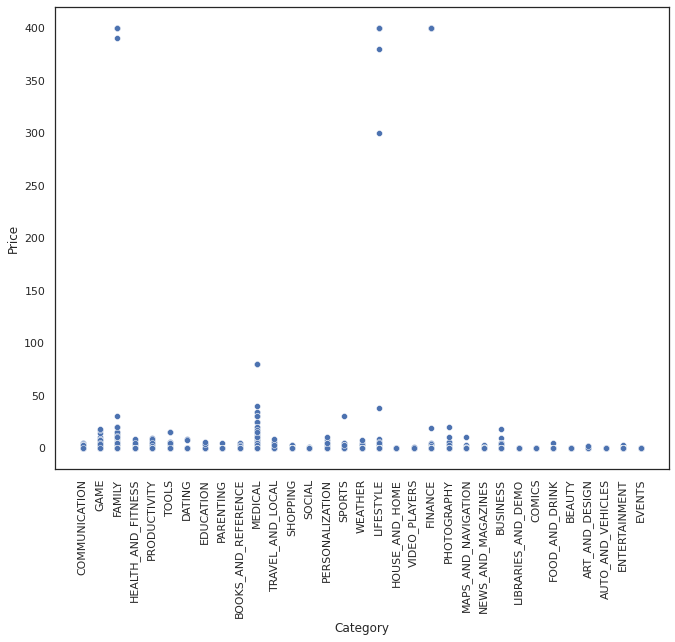

<Figure size 1008x648 with 0 Axes>

In [45]:

sns.scatterplot(x="Category", y="Price",data=df)

plt.xticks(rotation=90)
plt.figure(figsize=(14,9))
rcParams['figure.figsize'] = 11,8.5


Ignoring the catogories with price > 100$



1.   **Medical and Family** apps are the most expensive. Some medical apps extend even upto 80$.

2.   All other apps are priced under 30$.

3.   **Shocking**..... all **game** apps are reasonably priced below 20$.

In [46]:
paid_apps = df[df['Price'] > 0]

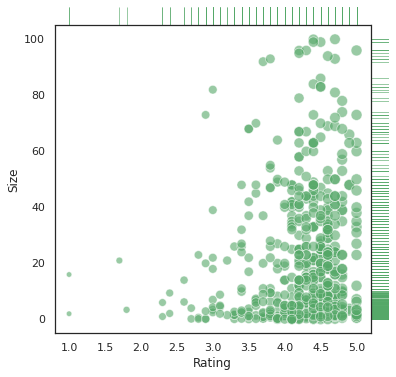

In [47]:
g = sns.JointGrid(data=paid_apps, x="Rating", y="Size", space=0, ratio=17)
sns.set_theme(style="white", color_codes=True)

g.plot_joint(sns.scatterplot, size=paid_apps["Rating"], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)



*   Majority of the paid apps that are highly rated have small sizes. This means that most paid apps are designed and developed to specific functionalities and hence are not bulky.

*   Users prefer to pay for apps that are light-weighted. A paid app that is bulky may not perform well in the market.




Finally, what is the minimum price for paid apps?


In [48]:
print("$ {}".format(paid_apps["Price"].min()))

$ 0.99


# **Rating vs. Content Rating**

In [49]:
df['Content Rating'].value_counts()

Everyone           6169
Teen                868
Mature 17+          368
Everyone 10+        318
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

Adults only 18+ and Unrated are values with very few records so we drop them.

In [50]:

df.drop(labels=df[ df['Content Rating'] == "Adults only 18+" ].index, inplace = True)
df.drop(labels=df[ df['Content Rating'] == "Unrated" ].index, inplace = True)


In [51]:
df['Content Rating'].value_counts()

Everyone        6169
Teen             868
Mature 17+       368
Everyone 10+     318
Name: Content Rating, dtype: int64

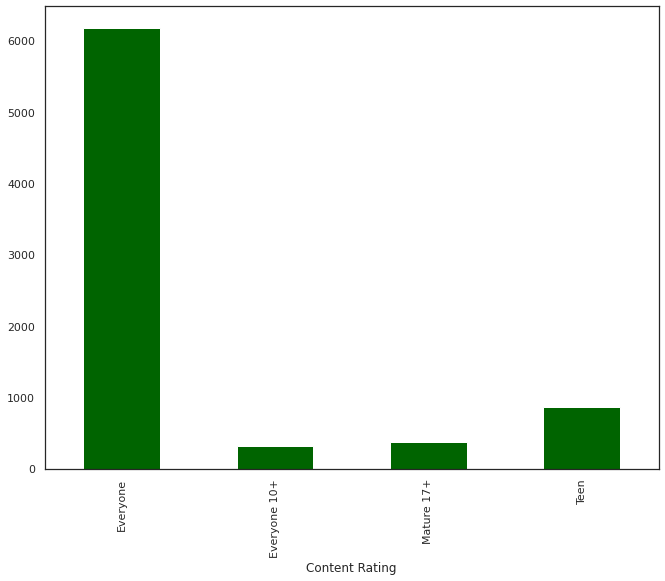

In [52]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkgreen")
plt.show()

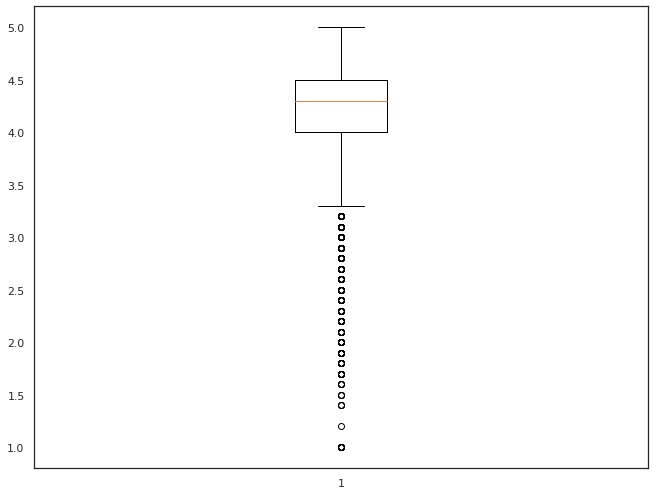

In [53]:
plt.boxplot(df['Rating'])
plt.show()

we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

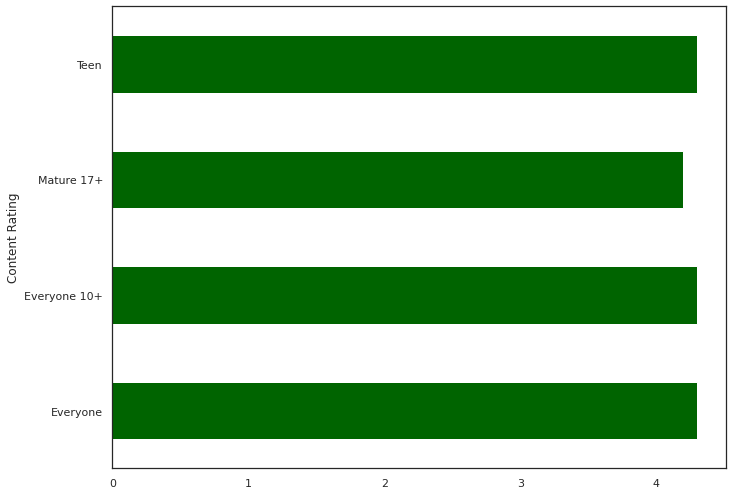

In [54]:
df.groupby(['Content Rating'])['Rating'].median().plot.barh(color="darkgreen")
plt.show()

In [55]:
corr = df.corr()
corr

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.079980,0.083862,0.052856,-0.021293
Reviews,0.079980,1.000000,0.240420,0.626187,-0.010183
Size,0.083862,0.240420,1.000000,0.162756,-0.026250
Installs,0.052856,0.626187,0.162756,1.000000,-0.010852
Price,-0.021293,-0.010183,-0.026250,-0.010852,1.000000


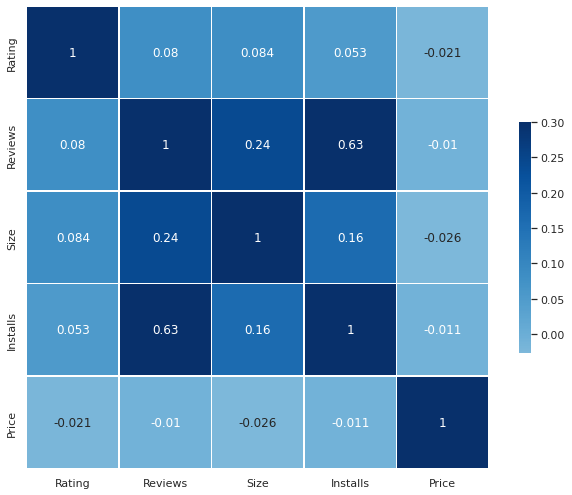

In [56]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,  vmax=.3, center=0, cmap="Blues",annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})







*   A moderate positive correlation of 0.63 exists between the number of reviews and number of downloads. This means that customers tend to download a given app more if it has been reviewed by a larger number of people.

*   This also means that many active users who download an app usually also leave back a review or feedback.

*   So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!



# **Look at all the numeric interactions together**

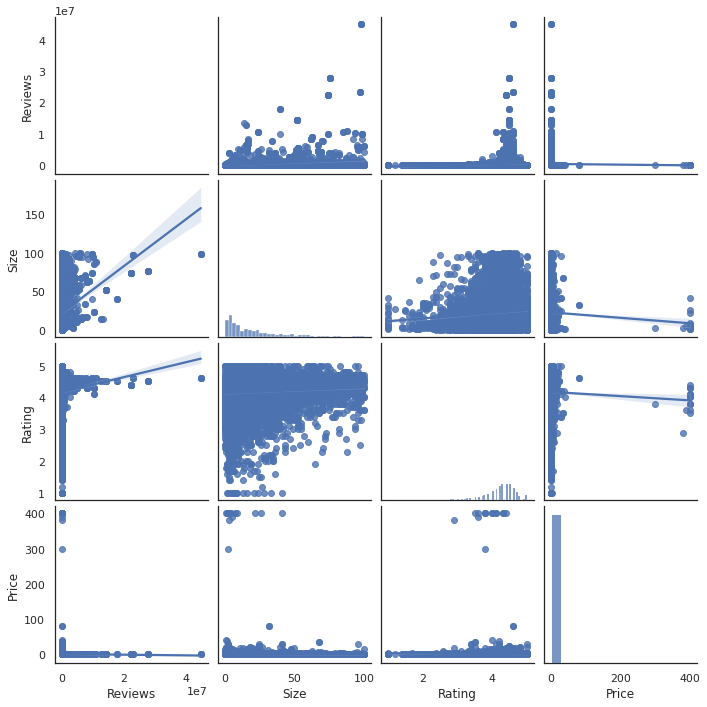

In [57]:
sns.pairplot(df, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

# **Analysis of Sentiments**

In [58]:
sentiment_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [59]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [60]:
sentiment_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Text(0.5, 1.0, 'Number of Nan values present in all columns')

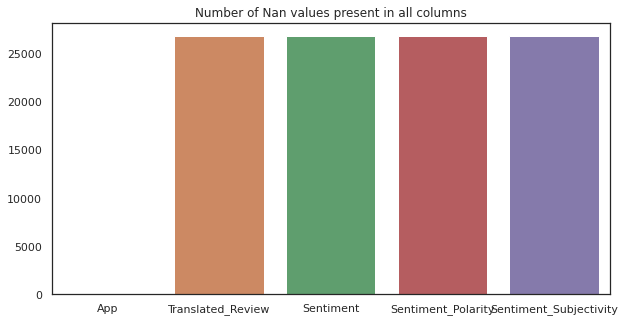

In [61]:
nan_columns = []
nan_values = []

for column in sentiment_df.columns:
    nan_columns.append(column)
    nan_values.append(sentiment_df[column].isnull().sum())

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(nan_columns, nan_values)
plt.title("Number of Nan values present in all columns")

Merge a slice of the original dataset that contains **App** names and **Types** with corresponding apps in this dataset.

In [62]:
sentiment_df = pd.merge(sentiment_df, df[["App","Type"]] , how='inner', on="App")

# Drop null values from sentiment data
sentiment_df = sentiment_df.dropna()

sentiment_df.shape

(44971, 6)

Now that we have our dataframe containing the data we need to answer the analysis, let's see how many apps of each type we have

In [63]:
#  Let's see how many apps of each type we have:
(values,counts)= np.unique(sentiment_df["Type"], return_counts=True)

for index in range(len(values)):
    print("{}: {}".format(values[index],counts[index]))

Free: 44189
Paid: 782


From above we can say that the sample size of free apps is close to 90 times the size of paid ones.

# **Free V/s Paid Sentiments** 

In [64]:
# A dataframe for each app type
free_apps = sentiment_df[sentiment_df["Type"] == "Free"]
paid_apps = sentiment_df[sentiment_df["Type"] == "Paid"]

In [65]:
# Return normalized values (percentages) of each value's occurrence & display them
print("Free Apps - Sentiment Percentage \n" + "-"*30 + "\n{}\n\n".format(free_apps['Sentiment'].value_counts(normalize=True) * 100))
print("Paid Apps - Sentiment Percentage \n" + "-"*30 +"\n{}".format(paid_apps['Sentiment'].value_counts(normalize=True) * 100))

Free Apps - Sentiment Percentage 
------------------------------
Positive    62.198737
Negative    26.520175
Neutral     11.281088
Name: Sentiment, dtype: float64


Paid Apps - Sentiment Percentage 
------------------------------
Positive    80.051151
Negative    14.578005
Neutral      5.370844
Name: Sentiment, dtype: float64


The percentage of positive sentiments in paid apps is significantly higher than that of free apps. 

In [66]:
# Reset index, then drop the old index column when it is moved to the right as a new column
paid_apps = paid_apps.reset_index().drop(columns=["index"])
free_apps = free_apps.reset_index().drop(columns=["index"])

# Generate a list of random indexes applicable to free_apps
random_indexes = np.random.choice(len(free_apps)-1, len(paid_apps), replace=False)

# Shorten free_apps to the same size of paid_apps & using a random selection
free_apps = free_apps.iloc[random_indexes]

# Reset index of free_apps
free_apps = free_apps.reset_index().drop(columns=["index"])

In [67]:
# Check the length of free apps
len(free_apps)

782

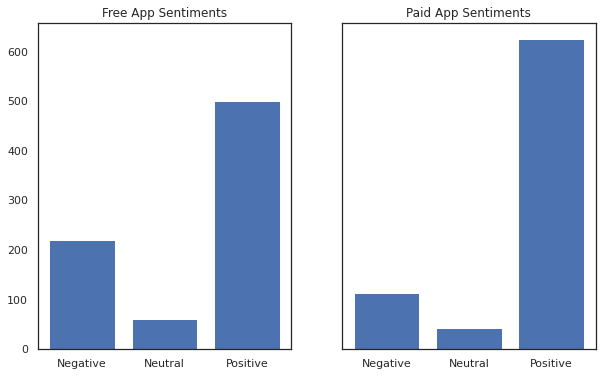

In [68]:
# Generate values & counts for Sentiment columns in our dataframes & put them in dictionaries
val_ct_free = np.unique(free_apps['Sentiment'],return_counts=True)
free_data = {value: count for value, count in zip(val_ct_free[0],val_ct_free[1])}

val_ct_paid = np.unique(paid_apps['Sentiment'],return_counts=True)
paid_data = {value: count for value, count in zip(val_ct_paid[0],val_ct_paid[1])}


# Put values and counts each in a different variable for use in plots, taken from dictionaries
free_names = list(free_data.keys())
free_values = list(free_data.values())
paid_names = list(paid_data.keys())
paid_values = list(paid_data.values())


# Create a figure containing plots for each app type, sharing the y-axis for comparison
fig, axs = plt.subplots(1, 2, figsize=(10, 6),sharey=True)
axs[0].bar(free_names, free_values)
axs[0].set_title("Free App Sentiments")
axs[1].bar(paid_names, paid_values)
axs[1].set_title("Paid App Sentiments")
plt.show()

free apps have more negative and neutral reviews, indicating higher variance of sentiments for free apps

# **Sentiment Polarity**

-The polarity of a sentiment measures how negative or positive the context is.

-In the data that we have, the polarity ranges from -1 (most negative) to +1 (most positive).

Let's find out by plotting polarity for both free & paid app types:

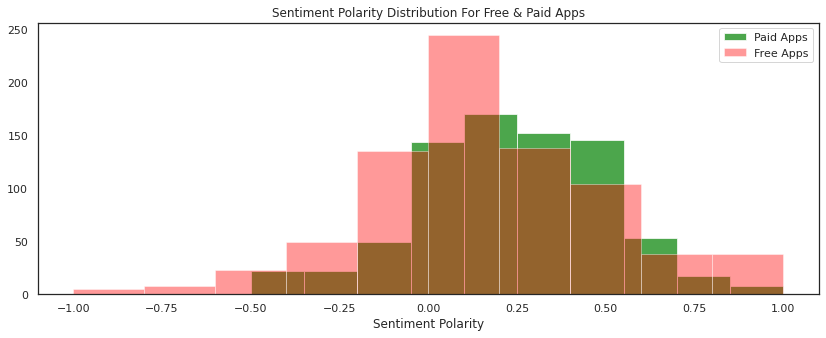

In [69]:
polarity_paid = paid_apps["Sentiment_Polarity"]
polarity_free = free_apps["Sentiment_Polarity"]

# Plot two histograms showing sentiment polarity of each app type
plt.figure(figsize=(14,5))
plt.hist(polarity_paid,  color="green",alpha=.7, label="Paid Apps") 
plt.hist(polarity_free, color="red",alpha=.4, label="Free Apps")

plt.title('Sentiment Polarity Distribution For Free & Paid Apps')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()

When we look at this graph, we find that there is more neutral polarity in free apps, as shown by the larger red region just above the 0.00 on the x axis. 

However there is a more extreme positive polarity for free apps, as seen on the x axis in the range of 0.5 to 1.00.

When it comes to Paid apps, the majority of opinions fall somewhere between 0 and 0.5. 

While some sentiments are exceptionally positive, none fall below -0.5, suggesting greater overall satisfaction with paid apps and demonstrating a minimum cap for negative sentiments.

# **Sentiment Analysis with Category**

In [70]:
# First we merge the Category & App of 1st data set to App column in 2nd data set
category_df = pd.merge(sentiment_df, df[["App","Category"]] , how='inner', on="App")

# Drop all nan values
category_df =category_df.dropna()

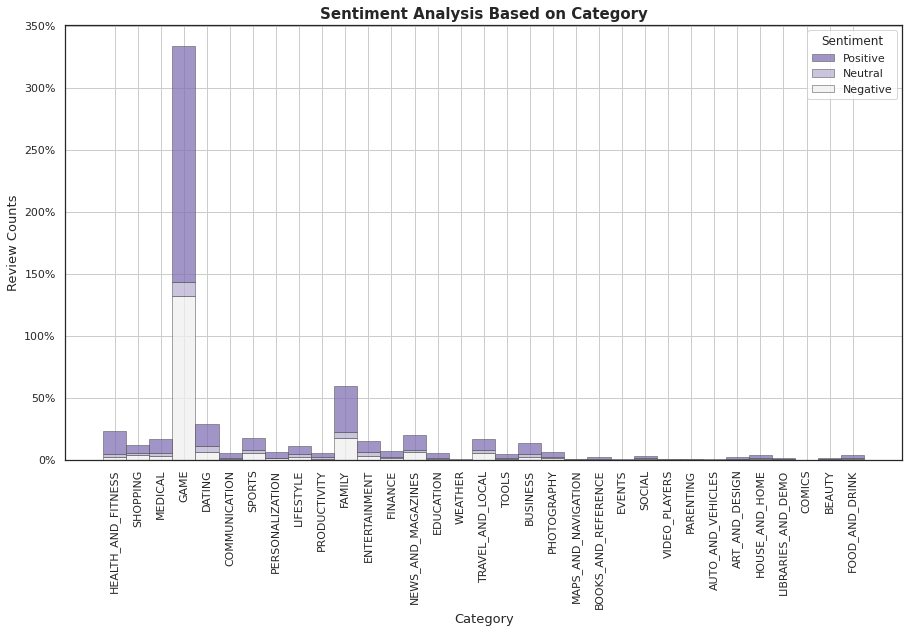

In [71]:
from matplotlib.ticker import PercentFormatter

f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)

sns.histplot(
    category_df,
    x="Category", hue="Sentiment",
    bins=34,
    ax=ax, 
    stat="count",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    legend=True
    )


ax.set_title("Sentiment Analysis Based on Category",fontsize=15,fontweight='bold')
plt.xticks(rotation='vertical')
ax.set_xlabel("Category",fontsize=13)
ax.set_ylabel("Review Counts",fontsize=13)

plt.gca().yaxis.set_major_formatter(PercentFormatter(20000))
sns.set(style="ticks")
plt.grid()
plt.show()

Family, Sports and Health & Fitness apps perform the best, Having more than 50% positive reviews

On the contrary, many Game and Social apps perform decent leading to 50% positive and 50% negative.

# **WORDCLOUD - A quick look on reviews**

## **Free Apps**

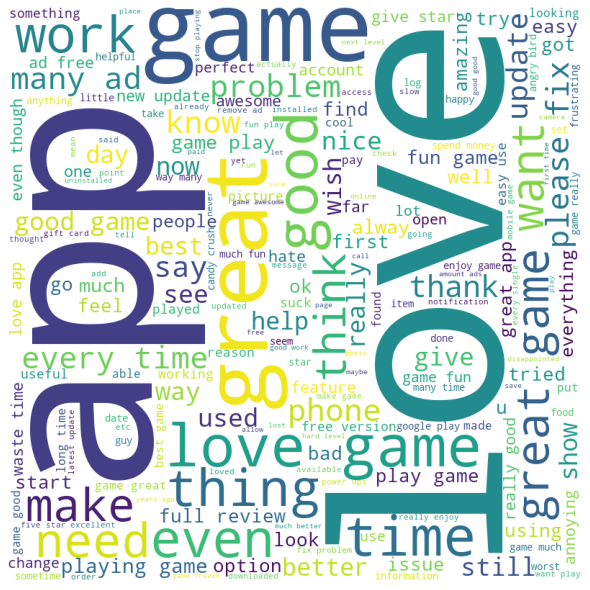

In [72]:
from wordcloud import WordCloud, STOPWORDS

free_apps = sentiment_df[sentiment_df["Type"] == "Free"]


comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in free_apps.Translated_Review:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

                
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## **Paid Apps**

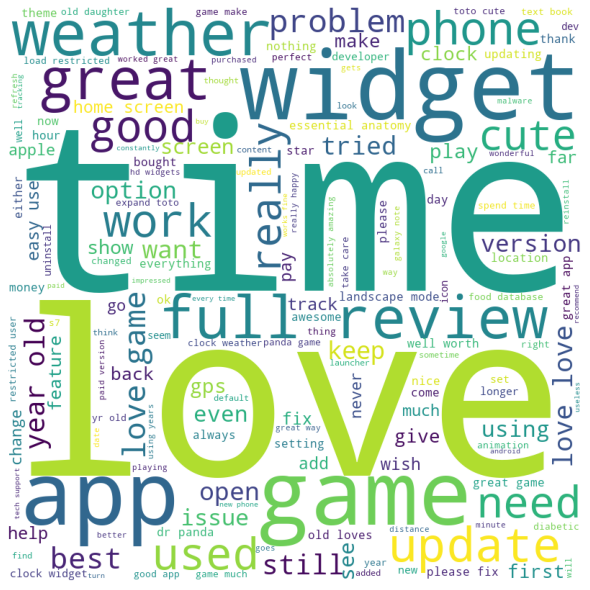

In [73]:
paid_apps = sentiment_df[sentiment_df["Type"] == "Paid"]


comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in paid_apps.Translated_Review:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

                
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# **Conclusion**



* Average rating of (active) apps on Google Play Store is 4.17.

* Users prefer to pay for apps that are light-weighted. Thus, a paid app that is bulky may not perform well in the market.

* Most of the top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.

* Most of the top rated apps are optimally priced between ~1$ to ~30$ - neither too cheap nor too expensive.

* **Medical and Family** apps are the most expensive and even extend upto 80$.

* Users tend to download a given app more if it has been reviewed by a large number of people.

* Paid apps have a slightly higher number of favourable reviews than free apps.

* Free apps get more negative and neutral feedback, suggesting a wider range of opinions.

* When it comes to free apps, users are more pessimistic and harsh than when it comes to paid apps.

* More than half users rate **Family, Sports and Health & Fitness** apps positively. Apps for games and social media get mixed reviews, with 50 percent positive and 50 percent negative responses.

